<a href="https://colab.research.google.com/github/ttogle918/ds-section2-sprint1/blob/main/n211-simple-regression/n211a-simple-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.


In [1]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

## 상관계수가 가장 높은 컬럼은 sqft_living이다.

In [2]:
# corr = df.corrwith(df['price'], method='spearman')
corr = df.corr().sort_values(by='price', ascending=False)
corr['price']

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

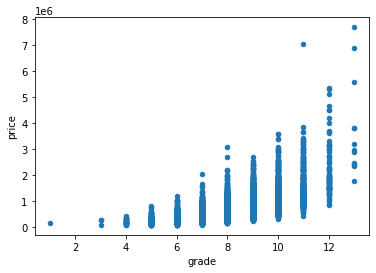

In [3]:
import matplotlib.pyplot as plt
df.plot(kind='scatter',x='grade',y='price')
plt.show()

### 2) sqft_living 와 price의 scatter plot을 그리고 기준모델을 시각화해 보세요.
- **기준모델의 값을 제출하세요. (소숫점 이하 반올림)**

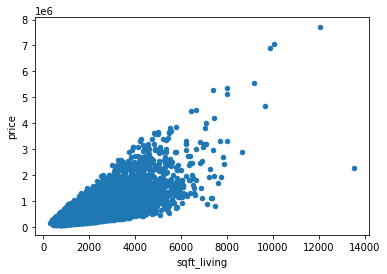

In [4]:
### 이곳에서 과제를 진행해 주세요 ###
import matplotlib.pyplot as plt
df.plot(kind='scatter',x='sqft_living',y='price')
plt.show()

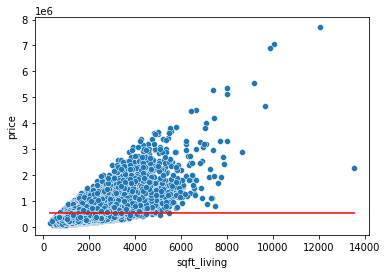

In [5]:
predict = df['price'].mean()  # predict : 기준모델의 값(회기는 mean)
error = predict - df['price']
mean_absolute_error = error.abs().mean()

import seaborn as sns
sns.lineplot(x=df['sqft_living'], y=predict, color='red')
sns.scatterplot(x=df['sqft_living'], y=df['price'])

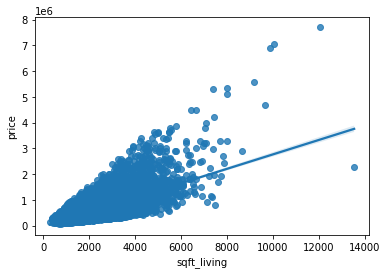

In [6]:
sns.regplot(x=df['sqft_living'], y=df['price'])

In [7]:
print(f'예측한 주택 가격이 ${predict:,.0f}이며 절대평균에러가 ${mean_absolute_error:,.0f}임을 확인할 수 있습니다.')

예측한 주택 가격이 $540,088이며 절대평균에러가 $233,942임을 확인할 수 있습니다.


### 3) Scikit-Learn 라이브러리를 사용해 특성 sqft_living에 대한 선형회귀모델을 만들어 보세요.
- **sqft_living 값이 4000인 경우에 모델이 예측하는 주택 가격을 제출하세요.(소수점 이하 반올림)**

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
feature = ['sqft_living']
target = ['price']
X_train = df[feature]
y_train = df[target]

In [9]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
X_test = [[4000]] # sqft_living 값이 4000인 경우
y_pred = model.predict(X_test)

In [11]:
print(f'{X_test[0][0]} sqft sqft_living를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

4000 sqft sqft_living를 가지는 주택의 예상 가격은 $1078913 입니다.


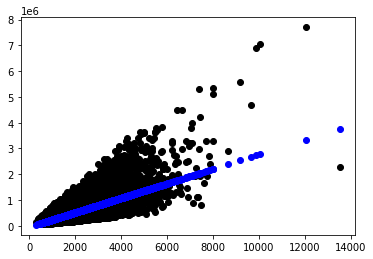

In [12]:
X_test = [[x] for x in df['sqft_living']]
y_pred = model.predict(X_test)

# train 데이터 : 검정색 점
plt.scatter(X_train, y_train, color='black', linewidth=1)

# test 데이터에 대한 예측 : 파란색 점
plt.scatter(X_test, y_pred, color='blue', linewidth=1);

### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **sqft_living 특성에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [13]:
X_test = [[10000]] # sqft_living 값이 4000인 경우
y_pred = model.predict(X_test)
print(f'{X_test[0][0]} sqft sqft_living를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

10000 sqft sqft_living를 가지는 주택의 예상 가격은 $2762654 입니다.


In [14]:
print("회귀계수 coefficient:",model.coef_)
print("y절편 :", model.intercept_)

회귀계수 coefficient: [[280.6235679]]
y절편 : [-43580.74309447]


### 5) bathrooms 특성을 사용하여 모델을 만들어보고 비교해 보세요.
- **bathrooms에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [15]:
# bathrooms에 대해 모델 생성
model = LinearRegression()
feature = ['bathrooms']
target = ['price']
X1_train = df[feature]
y1_train = df[target]

model.fit(X1_train, y1_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# bathrooms에 있는 모든 데이터를 test에 입력한다면 무슨의미가 있는지.?
X1_test = [[x] for x in df['bathrooms']]
y1_pred = model.predict(X1_test)

Text(0, 0.5, 'Price')

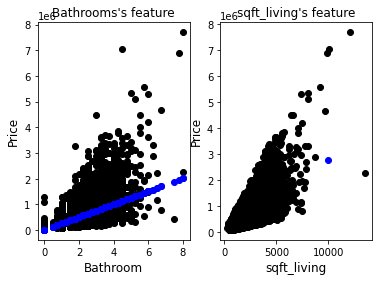

In [17]:
## train 데이터에 대한 그래프를 그려보겠습니다.
plt.scatter(X1_train, y1_train, color='black', linewidth=1)

## test 데이터에 대한 예측을 파란색 점으로 나타내 보겠습니다.
plt.subplot(1, 2, 1)

plt.scatter(X1_train, y1_train, color='black', linewidth=1) ## train
plt.scatter(X1_test, y1_pred, color='blue', linewidth=1)  ## test
plt.title('Bathrooms\'s feature')
plt.xlabel('Bathroom', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='black', linewidth=1) ## train
plt.scatter(X_test, y_pred, color='blue', linewidth=1)  ## test
plt.title('sqft_living\'s feature')
plt.xlabel('sqft_living', fontsize=12)
plt.ylabel('Price', fontsize=12)

In [18]:
print("회귀계수 coefficient:",model.coef_)
print("y절편 :", model.intercept_)

회귀계수 coefficient: [[250326.5163021]]
y절편 : [10708.30853037]


## 🔥도전과제

### 공지로 안내드리는 Github - Discussion 페이지에 올려보세요:)

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 논해보세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 본인의 언어로 설명해 보세요.

6)
1. 독립 변수에 대해 종속 변수가 시간에 따라 변하는 모습을 고려해야한다.
2. target에 영향을 끼치는 feature을 잘 선택해야한다.
3. (2)을 위해서 target값과 다른 feature들의 상관관계를 봐야한다. (상관계수가 1에 가까울수록 관련있는 것이다.)
3. 수치로 표현된 양적변수는 회귀분석하기에 용이하다. (non-category 변수)
4. 질적변수(category 변수)도 연속적 수치로 변환하여서 회귀분석에 사용할 수 있다.

7)
1. OLS란?